In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [185]:
# Load dataset
file_path = 'D:\Tugas Akhir\Stroke\data_train.csv'
df = pd.read_csv(file_path)

# Pisahkan fitur dan target
X = df.drop('stroke', axis=1)
y = df['stroke']

In [186]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,0.1579,0,0,0,0,1,0,1,0.1477,0.5599,1,0,0,0,0
1,1,0.3509,0,0,0,0,0,1,0,0.1536,0.3719,0,0,1,0,0
2,1,0.4912,1,1,1,0,1,0,0,0.6513,0.2810,0,0,0,1,0
3,0,0.3158,0,0,0,1,0,0,0,0.1349,0.3864,0,0,0,1,0
4,1,0.9474,0,0,1,0,0,1,0,0.1067,0.4277,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,1,0.0175,0,0,1,0,1,0,1,0.0403,0.1302,0,0,1,0,0
2947,0,0.5088,0,0,1,0,1,0,1,0.2090,0.8037,0,1,0,0,0
2948,1,0.6491,0,0,1,0,1,0,0,0.7270,0.5062,0,0,1,0,0
2949,0,0.2982,0,0,1,0,1,0,1,0.2561,0.4360,0,1,0,0,0


In [187]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()
# Tampilkan output
print("Frekuensi nilai unik dalam kolom 'stroke':")
print(stroke_counts)

Frekuensi nilai unik dalam kolom 'stroke':
stroke
0    2785
1     166
Name: count, dtype: int64


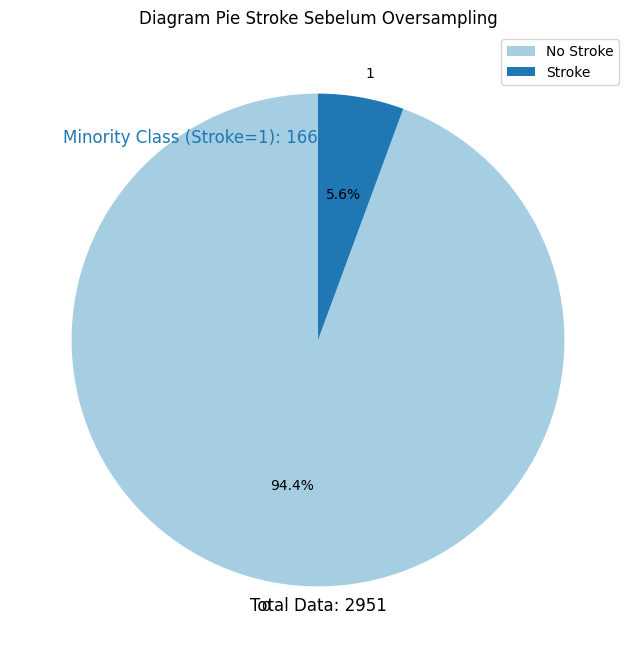

In [188]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))

# Tambahkan warna untuk setiap sektor pada diagram pie
colors = plt.cm.Paired.colors

# Plot diagram pie
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Tambahkan keterangan total data
total_data = len(df['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='center')

# Tambahkan penanda untuk kelas minoritas
minority_class_count = stroke_counts[1]  # Ambil frekuensi kelas minoritas
plt.text(0, 0.8, f'Minority Class (Stroke=1): {minority_class_count}', fontsize=12, ha='right', color=colors[1])

# Tambahkan legenda dengan posisi yang lebih baik
plt.legend(labels=['No Stroke', 'Stroke'], loc='upper right')

# Berikan judul
plt.title('Diagram Pie Stroke Sebelum Oversampling')

# Tampilkan diagram
plt.show()


In [189]:
# Langkah 1: Pilih sampel minoritas
minority_class = X[y == 1]

# Tampilkan jumlah sampel minoritas
print("Jumlah Sampel Minoritas (Stroke=1):", len(minority_class))


Jumlah Sampel Minoritas (Stroke=1): 166


In [190]:
print(df.dtypes)

gender                              int64
age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
work_type_Govt_job                  int64
work_type_Private                   int64
work_type_Self-employed             int64
Residence_type                      int64
avg_glucose_level                 float64
bmi                               float64
smoking_status_Unknown              int64
smoking_status_formerly smoked      int64
smoking_status_never smoked         int64
smoking_status_smokes               int64
stroke                              int64
dtype: object


Hasil Perhitungan Jarak:
Distances:
[[1.09331736 1.32218828]
 [0.28624615 1.07911498]
 [1.1121938  1.14431231]
 ...
 [0.57028948 0.68927816]
 [0.48077971 0.50584727]
 [1.03501535 1.09828232]]
Indices:
[[135  42]
 [132  35]
 [136  85]
 ...
 [101  61]
 [ 72 160]
 [161  97]]


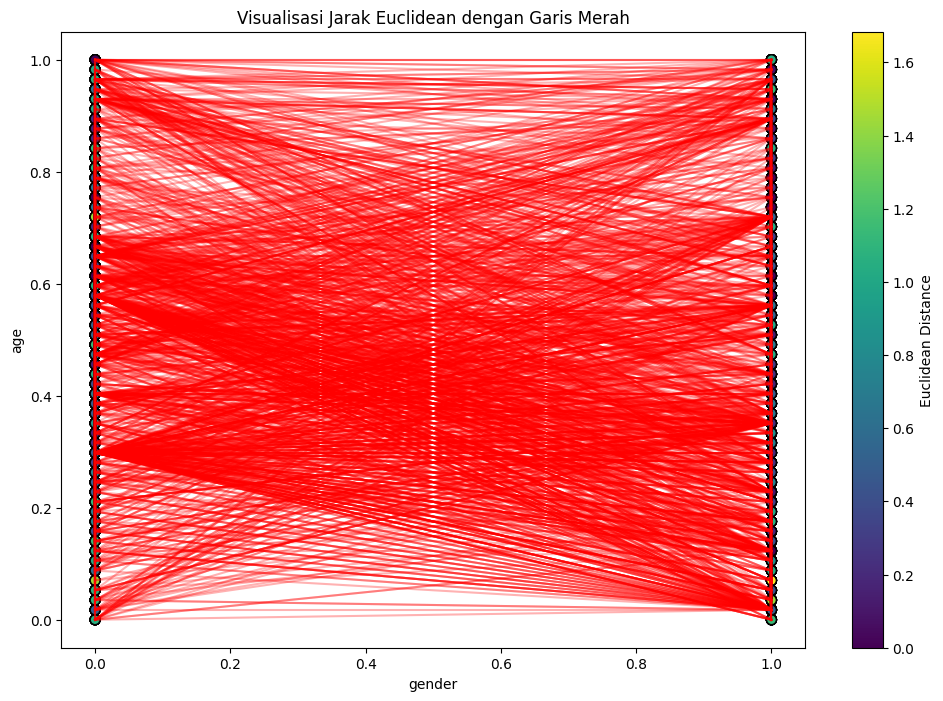

In [191]:
from sklearn.neighbors import NearestNeighbors

# Langkah 2: Hitung Jarak
nn = NearestNeighbors(n_neighbors=2, metric='euclidean')
nn.fit(minority_class)
distances, indices = nn.kneighbors(X)

# Tampilkan hasil perhitungan jarak
print("Hasil Perhitungan Jarak:")
print("Distances:")
print(distances)
print("Indices:")
print(indices)

import matplotlib.pyplot as plt

# Visualisasi Scatter Plot dengan Garis
plt.figure(figsize=(12, 8))

# Scatter plot dengan warna marker berdasarkan jarak
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=distances[:, 0], cmap='viridis', edgecolors='k', s=50)

# Menambahkan garis merah yang menghubungkan setiap sampel dengan dua tetangganya
for i in range(len(X)):
    plt.plot([X.iloc[i, 0], X.iloc[indices[i, 0], 0]], [X.iloc[i, 1], X.iloc[indices[i, 0], 1]], 'r-', alpha=0.3)

# Menambahkan colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Euclidean Distance')

# Menambahkan label dan judul
plt.xlabel(X.columns[0])  # Nama kolom fitur 1
plt.ylabel(X.columns[1])  # Nama kolom fitur 2
plt.title('Visualisasi Jarak Euclidean dengan Garis Merah')

# Tampilkan diagram
plt.show()


In [192]:
# Langkah 3: Hitung Rasio
ratio = len(X[y == 0]) / len(minority_class)
print("Rasio antara kelas mayoritas dan kelas minoritas:", ratio)


Rasio antara kelas mayoritas dan kelas minoritas: 16.77710843373494


In [193]:
# # Langkah 4: Hitung Rasio ADASYN
# desired_ratio = 0.4  # Set sesuai dengan target Anda (30-40%)
# raw_adasyn_ratio = min((desired_ratio / ratio, 1.0))  # Hitung rasio sebelum dikurangi 0.01
# adasyn_ratio = max(raw_adasyn_ratio - 0.01, 1.0)  # Sesuaikan dengan rasio yang diinginkan
# print("Jumlah Sampel Minoritas :", len(minority_class))
# print("Desired Ratio (Rasio yang diinginkan):", desired_ratio)
# print("ADASYN Ratio (Rasio yang digunakan untuk ADASYN):", adasyn_ratio)

# Langkah 4: Hitung Rasio ADASYN
desired_ratio = 0.65  
raw_adasyn_ratio = min((desired_ratio / ratio, 1.0))  
adasyn_ratio = max(raw_adasyn_ratio - 0.01, 0.65)  
print("Jumlah Sampel Minoritas :", len(minority_class))
print("Desired Ratio (Rasio yang diinginkan):", desired_ratio)
print("ADASYN Ratio (Rasio yang digunakan untuk ADASYN):", adasyn_ratio)

Jumlah Sampel Minoritas : 166
Desired Ratio (Rasio yang diinginkan): 0.65
ADASYN Ratio (Rasio yang digunakan untuk ADASYN): 0.65


In [194]:
# # Langkah 5: Hitung Weight
# weights = distances[:, 1] * (1 + adasyn_ratio)  # Sesuaikan dengan rasio yang diinginkan
# print("Weight", weights)
# # Buat histogram dari weights
# plt.hist(weights, bins=20, color='blue', edgecolor='black')

# # Atur label dan judul
# plt.xlabel('Weight')
# plt.ylabel('Frequency')
# plt.title('Distribution of Weights in ADASYN')

# # Tampilkan plot
# plt.show()

In [195]:
# Langkah 5: Buat Sampel Sintetis (solusi alternatif)
# Tampilkan jumlah sampel minoritas sebelum oversampling
print("Jumlah Sampel Minoritas Sebelum Oversampling (Stroke=1):", len(y[y == 1]))

# Oversampling menggunakan ADASYN tanpa batasan
adasyn = ADASYN(sampling_strategy=adasyn_ratio, random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Tampilkan jumlah sampel minoritas setelah oversampling
print("Jumlah Sampel Minoritas Setelah Oversampling (Stroke=1):", sum(y_resampled == 1))

Jumlah Sampel Minoritas Sebelum Oversampling (Stroke=1): 166
Jumlah Sampel Minoritas Setelah Oversampling (Stroke=1): 1843


In [196]:
# Langkah 7: Gabungkan Sampel Sintetis dengan Dataset Asli
oversampled_data = pd.DataFrame(X_resampled, columns=X.columns)
oversampled_labels = pd.Series(y_resampled, name='stroke')

# Verifikasi jumlah sampel setelah oversampling
jumlah_sampel_data_asli = len(X)
jumlah_sampel_sintetis = len(X_resampled) - len(X)
jumlah_sampel_setelah_oversampling = len(oversampled_data)

print("Jumlah Sampel Data Asli:", jumlah_sampel_data_asli)
print("Jumlah Sampel Sintetis:", jumlah_sampel_sintetis)
print("Jumlah Sampel Setelah Oversampling:", jumlah_sampel_setelah_oversampling)


Jumlah Sampel Data Asli: 2951
Jumlah Sampel Sintetis: 1677
Jumlah Sampel Setelah Oversampling: 4628


In [197]:
oversampled_data

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.157900,0,0,0,0,1,0,1,0.147700,0.559900,1,0,0,0
1,1,0.350900,0,0,0,0,0,1,0,0.153600,0.371900,0,0,1,0
2,1,0.491200,1,1,1,0,1,0,0,0.651300,0.281000,0,0,0,1
3,0,0.315800,0,0,0,1,0,0,0,0.134900,0.386400,0,0,0,1
4,1,0.947400,0,0,1,0,0,1,0,0.106700,0.427700,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,1,0.640440,0,0,1,0,1,0,1,0.038482,0.319653,0,1,0,0
4624,1,0.732432,0,0,1,0,1,0,1,0.064016,0.281763,0,1,0,0
4625,1,0.719378,0,0,1,0,1,0,1,0.060393,0.287139,0,1,0,0
4626,1,0.462054,0,0,1,0,1,0,1,0.072619,0.384643,0,1,0,0


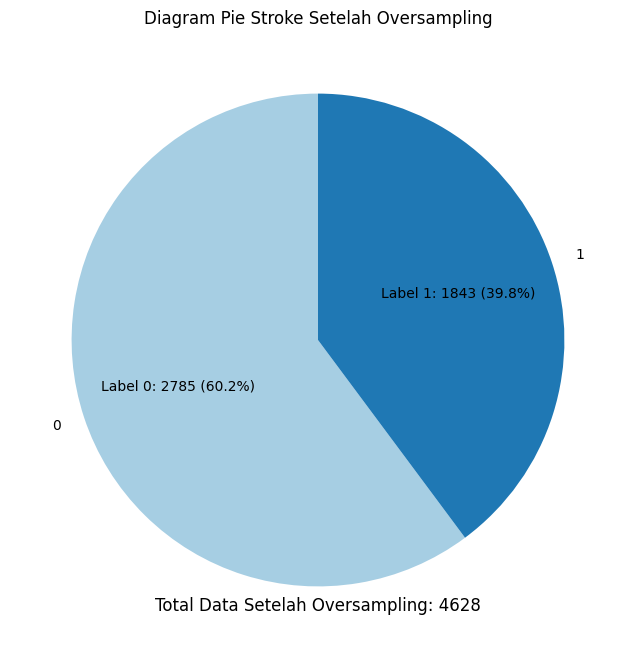

In [198]:
# Hitung frekuensi nilai unik dalam kolom 'stroke' setelah oversampling
oversampled_stroke_counts = oversampled_labels.value_counts()

# Plotting diagram pie untuk kolom 'stroke' setelah oversampling
plt.figure(figsize=(8, 8))
pie_chart, _, autotexts = plt.pie(oversampled_stroke_counts, labels=oversampled_stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops=dict(color="black"))

# Tambahkan keterangan total data setelah oversampling
total_data_oversampled = len(oversampled_labels)
plt.text(0, -1.1, f'Total Data Setelah Oversampling: {total_data_oversampled}', fontsize=12, ha='center')

# Tambahkan keterangan jumlah data pada label 0 pada legenda
label_0_count = oversampled_stroke_counts[0]
autotexts[0].set_text(f'Label 0: {label_0_count} ({oversampled_stroke_counts[0]/total_data_oversampled*100:.1f}%)')

# Tambahkan keterangan jumlah data pada label 1 pada legenda
label_1_count = oversampled_stroke_counts[1]
autotexts[1].set_text(f'Label 1: {label_1_count} ({oversampled_stroke_counts[1]/total_data_oversampled*100:.1f}%)')

# Berikan judul
plt.title('Diagram Pie Stroke Setelah Oversampling')

# Tampilkan diagram setelah oversampling
plt.show()


In [199]:
# Hitung jumlah data pada stroke 0 dan stroke 1 setelah oversampling
jumlah_data_stroke_0 = oversampled_labels.value_counts()[0]
jumlah_data_stroke_1 = oversampled_labels.value_counts()[1]

# Tampilkan jumlah data pada stroke 0 dan stroke 1
print("Jumlah Data Stroke 0 Setelah Oversampling:", jumlah_data_stroke_0)
print("Jumlah Data Stroke 1 Setelah Oversampling:", jumlah_data_stroke_1)

Jumlah Data Stroke 0 Setelah Oversampling: 2785
Jumlah Data Stroke 1 Setelah Oversampling: 1843


In [200]:
import shutil

# Langkah 8: Gabungkan DataFrame fitur dan label target
oversampled_data_with_labels = pd.concat([oversampled_data, oversampled_labels], axis=1)

# Langkah 9: Simpan DataFrame ke dalam file CSV dengan label target
output_file_path = 'D:\\Tugas Akhir\\Stroke\\data_oversampled.csv'
oversampled_data_with_labels.to_csv(output_file_path, index=False, decimal=',')

# Langkah 10: Konfirmasi penyimpanan
print(f"DataFrame setelah oversampling telah disimpan di: {output_file_path}")

# (Opsional) Langkah 11: Pindahkan file ke lokasi yang diinginkan
destination_path = 'D:\\Tugas Akhir\\Stroke\\data_oversampled.csv'
shutil.move(output_file_path, destination_path)

# Konfirmasi pemindahan
print(f"File telah dipindahkan ke: {destination_path}")


DataFrame setelah oversampling telah disimpan di: D:\Tugas Akhir\Stroke\data_oversampled.csv
File telah dipindahkan ke: D:\Tugas Akhir\Stroke\data_oversampled.csv


In [201]:
oversampled_data_with_labels

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,0.157900,0,0,0,0,1,0,1,0.147700,0.559900,1,0,0,0,0
1,1,0.350900,0,0,0,0,0,1,0,0.153600,0.371900,0,0,1,0,0
2,1,0.491200,1,1,1,0,1,0,0,0.651300,0.281000,0,0,0,1,0
3,0,0.315800,0,0,0,1,0,0,0,0.134900,0.386400,0,0,0,1,0
4,1,0.947400,0,0,1,0,0,1,0,0.106700,0.427700,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,1,0.640440,0,0,1,0,1,0,1,0.038482,0.319653,0,1,0,0,1
4624,1,0.732432,0,0,1,0,1,0,1,0.064016,0.281763,0,1,0,0,1
4625,1,0.719378,0,0,1,0,1,0,1,0.060393,0.287139,0,1,0,0,1
4626,1,0.462054,0,0,1,0,1,0,1,0.072619,0.384643,0,1,0,0,1


<Axes: >

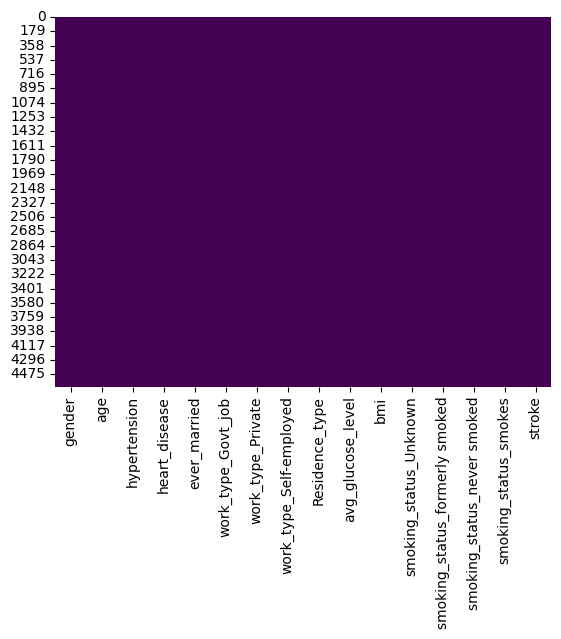

In [202]:
import seaborn as sns
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(oversampled_data_with_labels.isnull(), cbar=False, cmap='viridis')